In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
home_dir = '/u/msegal/'
home_dir

'/u/msegal/'

In [3]:
# create absolute path object
home_dir = Path(home_dir).absolute()
home_dir

PosixPath('/u/msegal')

In [4]:
CV_report = '/u/msegal/CV_report'
CV_report = Path(CV_report).absolute()
CV_report

PosixPath('/u/msegal/CV_report')

In [5]:
# create a folder to save figures 
save_dir = 'CV_report/figures'
Path(save_dir).mkdir(parents=True, exist_ok=True)

In [6]:
!pwd

/u/msegal/public_html/C114/experimental_data


In [7]:
!cp -rL public_html/C114/experimental_data/CV/* /u/msegal/CV_report
!ls /u/msegal/CV_report

cp: cannot stat ‘public_html/C114/experimental_data/CV/*’: No such file or directory
figures				iii_0.006M_KNO3_200mV_sec.txt
i_0.004M_KNO3_after_purge.txt	iii_0.008M_KNO3_200mV_sec.txt
i_0.004M_KNO3_before_purge.txt	iii_0.010M_KNO3_200mV_sec.txt
ii_0.004M_KNO3_10mV_sec.txt	i_KNO3_after_purge.txt
ii_0.004M_KNO3_110mV_sec.txt	i_KNO3_before_purge.txt
ii_0.004M_KNO3_130mV_sec.txt	i_Na2SO4_after_purge.txt
ii_0.004M_KNO3_150mV_sec.txt	i_Na2SO4_before_purge.txt
ii_0.004M_KNO3_170mV_sec.txt	iv_0.004M_KNO3_200mV_sec_stirring.txt
ii_0.004M_KNO3_190mV_sec.txt	iv_0.004M_KNO3_20mV_sec_stirring.txt
ii_0.004M_KNO3_200mV_sec.txt	v_0.004M_KNO3_200mV_sec_reverse.txt
ii_0.004M_KNO3_30mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial1.txt
ii_0.004M_KNO3_50mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial2.txt
ii_0.004M_KNO3_70mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial3.txt
ii_0.004M_KNO3_90mV_sec.txt	vii_0.004M_Na2SO4_200mV_sec.txt
iii_0.002M_KNO3_200mV_sec.txt


In [8]:
# check that working_dir is what you think it is
# and contains your files

!ls $CV_report

figures				iii_0.006M_KNO3_200mV_sec.txt
i_0.004M_KNO3_after_purge.txt	iii_0.008M_KNO3_200mV_sec.txt
i_0.004M_KNO3_before_purge.txt	iii_0.010M_KNO3_200mV_sec.txt
ii_0.004M_KNO3_10mV_sec.txt	i_KNO3_after_purge.txt
ii_0.004M_KNO3_110mV_sec.txt	i_KNO3_before_purge.txt
ii_0.004M_KNO3_130mV_sec.txt	i_Na2SO4_after_purge.txt
ii_0.004M_KNO3_150mV_sec.txt	i_Na2SO4_before_purge.txt
ii_0.004M_KNO3_170mV_sec.txt	iv_0.004M_KNO3_200mV_sec_stirring.txt
ii_0.004M_KNO3_190mV_sec.txt	iv_0.004M_KNO3_20mV_sec_stirring.txt
ii_0.004M_KNO3_200mV_sec.txt	v_0.004M_KNO3_200mV_sec_reverse.txt
ii_0.004M_KNO3_30mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial1.txt
ii_0.004M_KNO3_50mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial2.txt
ii_0.004M_KNO3_70mV_sec.txt	vi_0.004M_KNO3_1mV_sec_trial3.txt
ii_0.004M_KNO3_90mV_sec.txt	vii_0.004M_Na2SO4_200mV_sec.txt
iii_0.002M_KNO3_200mV_sec.txt


In [9]:
# sort to have chronological order for repeats

filepaths = sorted([f for f in Path(CV_report).glob('*.txt')]) 
fnames = [f.name for f in filepaths]
filepaths, fnames

([PosixPath('/u/msegal/CV_report/i_0.004M_KNO3_after_purge.txt'),
  PosixPath('/u/msegal/CV_report/i_0.004M_KNO3_before_purge.txt'),
  PosixPath('/u/msegal/CV_report/i_KNO3_after_purge.txt'),
  PosixPath('/u/msegal/CV_report/i_KNO3_before_purge.txt'),
  PosixPath('/u/msegal/CV_report/i_Na2SO4_after_purge.txt'),
  PosixPath('/u/msegal/CV_report/i_Na2SO4_before_purge.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_10mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_110mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_130mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_150mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_170mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_190mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_200mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_30mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_KNO3_50mV_sec.txt'),
  PosixPath('/u/msegal/CV_report/ii_0.004M_

In [10]:
df_names = [f.split('.txt')[0] for f in fnames]
df_names

['i_0.004M_KNO3_after_purge',
 'i_0.004M_KNO3_before_purge',
 'i_KNO3_after_purge',
 'i_KNO3_before_purge',
 'i_Na2SO4_after_purge',
 'i_Na2SO4_before_purge',
 'ii_0.004M_KNO3_10mV_sec',
 'ii_0.004M_KNO3_110mV_sec',
 'ii_0.004M_KNO3_130mV_sec',
 'ii_0.004M_KNO3_150mV_sec',
 'ii_0.004M_KNO3_170mV_sec',
 'ii_0.004M_KNO3_190mV_sec',
 'ii_0.004M_KNO3_200mV_sec',
 'ii_0.004M_KNO3_30mV_sec',
 'ii_0.004M_KNO3_50mV_sec',
 'ii_0.004M_KNO3_70mV_sec',
 'ii_0.004M_KNO3_90mV_sec',
 'iii_0.002M_KNO3_200mV_sec',
 'iii_0.006M_KNO3_200mV_sec',
 'iii_0.008M_KNO3_200mV_sec',
 'iii_0.010M_KNO3_200mV_sec',
 'iv_0.004M_KNO3_200mV_sec_stirring',
 'iv_0.004M_KNO3_20mV_sec_stirring',
 'v_0.004M_KNO3_200mV_sec_reverse',
 'vi_0.004M_KNO3_1mV_sec_trial1',
 'vi_0.004M_KNO3_1mV_sec_trial2',
 'vi_0.004M_KNO3_1mV_sec_trial3',
 'vii_0.004M_Na2SO4_200mV_sec']

In [11]:
import pandas as pd

In [12]:
df_list = []
for f in filepaths:
    df = pd.read_csv(f, sep='\x00|\t ', skiprows=2, names =['NaN', 'x', 'y'], index_col=1, engine='python', skipfooter=1).drop(axis=0, columns='NaN')
    df_list.append(df)

In [13]:
df_list[0]

,y
x,
1.00000,-0.000051
0.99600,-0.000047
0.99225,-0.000044
0.98825,-0.000042
0.98425,-0.000040
...,...
0.98425,-0.000092
0.98825,-0.000092
0.99225,-0.000093


In [14]:
keys = [i.split('.txt')[0] for i in fnames]
values = df_list

df_dict = dict(zip(keys, values))

df_dict

{'i_0.004M_KNO3_after_purge':                 y
 x                
 1.00000 -0.000051
 0.99600 -0.000047
 0.99225 -0.000044
 0.98825 -0.000042
 0.98425 -0.000040
 ...           ...
 0.98425 -0.000092
 0.98825 -0.000092
 0.99225 -0.000093
 0.99600 -0.000093
 1.00000 -0.000094
 
 [1019 rows x 1 columns],
 'i_0.004M_KNO3_before_purge':                 y
 x                
 1.00000 -0.000082
 0.99600 -0.000076
 0.99225 -0.000073
 0.98825 -0.000069
 0.98425 -0.000066
 ...           ...
 0.98425 -0.000116
 0.98825 -0.000117
 0.99225 -0.000118
 0.99600 -0.000119
 1.00000 -0.000120
 
 [1019 rows x 1 columns],
 'i_KNO3_after_purge':                     y
 x                    
 1.00000 -2.560000e-06
 0.99600 -1.000000e-08
 0.99225  2.400000e-07
 0.98825  9.410000e-07
 0.98425  1.423000e-06
 ...               ...
 0.98425 -1.335000e-05
 0.98825 -1.357000e-05
 0.99225 -1.345000e-05
 0.99600 -1.339000e-05
 1.00000 -1.351000e-05
 
 [1019 rows x 1 columns],
 'i_KNO3_before_purge':                   

In [17]:
# access measuremet names
df_dict.keys()

dict_keys(['i_0.004M_KNO3_after_purge', 'i_0.004M_KNO3_before_purge', 'i_KNO3_after_purge', 'i_KNO3_before_purge', 'i_Na2SO4_after_purge', 'i_Na2SO4_before_purge', 'ii_0.004M_KNO3_10mV_sec', 'ii_0.004M_KNO3_110mV_sec', 'ii_0.004M_KNO3_130mV_sec', 'ii_0.004M_KNO3_150mV_sec', 'ii_0.004M_KNO3_170mV_sec', 'ii_0.004M_KNO3_190mV_sec', 'ii_0.004M_KNO3_200mV_sec', 'ii_0.004M_KNO3_30mV_sec', 'ii_0.004M_KNO3_50mV_sec', 'ii_0.004M_KNO3_70mV_sec', 'ii_0.004M_KNO3_90mV_sec', 'iii_0.002M_KNO3_200mV_sec', 'iii_0.006M_KNO3_200mV_sec', 'iii_0.008M_KNO3_200mV_sec', 'iii_0.010M_KNO3_200mV_sec', 'iv_0.004M_KNO3_200mV_sec_stirring', 'iv_0.004M_KNO3_20mV_sec_stirring', 'v_0.004M_KNO3_200mV_sec_reverse', 'vi_0.004M_KNO3_1mV_sec_trial1', 'vi_0.004M_KNO3_1mV_sec_trial2', 'vi_0.004M_KNO3_1mV_sec_trial3', 'vii_0.004M_Na2SO4_200mV_sec'])

In [21]:
# access a single DataFrame
df_dict['i_0.004M_KNO3_after_purge']

,y
x,
1.00000,-0.000051
0.99600,-0.000047
0.99225,-0.000044
0.98825,-0.000042
0.98425,-0.000040
...,...
0.98425,-0.000092
0.98825,-0.000092
0.99225,-0.000093


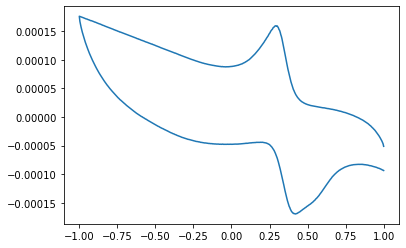

In [24]:
plt.plot(df_dict['i_0.004M_KNO3_after_purge']);